<a href="https://colab.research.google.com/github/aawadall/nlp-sheets/blob/main/experiments/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Experiment 2 - Tensorflow
Experiment with Tensorflow basic operations 
follow along [FreeCodeCamp's Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

## Module 1 - Introduction

### Install TF
for local environment, we need to run


```
!pip install --upgrade tensorflow
```

for colab 
```
%tensorflow_version 2.x
```


In [3]:
#@title Select environment
environment = "collab" #@param ["collab", "local"]



In [4]:
if environment == 'collab':
  %tensorflow_version 2.x
elif environment == 'local':
  !pip install --upgrade tensorflow 
  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Now we import tensorflow as tf and check version

In [5]:
import tensorflow as tf 
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


### Create Tensors 
create three tensors of three datatypes 
* string 
* number 
* float 

In [6]:
str_tensor = tf.Variable("string tensor", tf.string)
num_tensor = tf.Variable(42, tf.int16)
float_tensor = tf.Variable(3.14159, tf.float64)

### Rank/Degree
check rank/degree of tensors

In [7]:
rank1_tensor = tf.Variable(["The", "quick", "brown", "fox"], tf.string)
rank2_tensor = tf.Variable([["this", "is", "a", "sentence"],["the", "other", "sentence", "follows"]], tf.string)

let us check its ranks

In [8]:
ranks_vec = []
ranks_vec.append(tf.rank(str_tensor))
ranks_vec.append(tf.rank(rank1_tensor))
ranks_vec.append(tf.rank(rank2_tensor))

# print 
ranks_vec

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>]

check shapes

In [9]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1])
tensor3 = tf.reshape(tensor2, [3, -1])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [10]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


### Toy example

In [11]:
t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t, [25, -1])
print(t)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0.

## Module 3 - Learning Algo
* [ ] Linear Regression 
* [ ] Classification 
* [ ] Clustering 
* [ ] HMM


### Linear Regression

(0.0, 6.0, 0.0, 20.0)

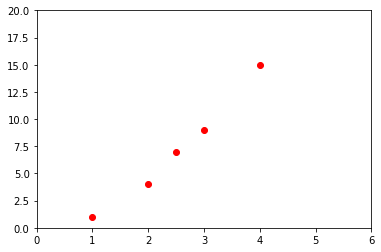

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

Install sklearn

In [13]:
!pip install -q sklearn

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc 


Load dataset 

In [15]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

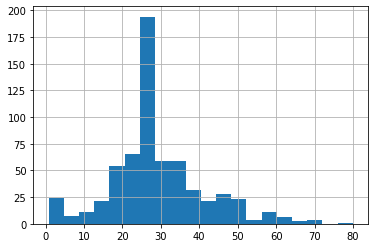

In [16]:
dftrain.age.hist(bins=20)

In [17]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']


#### Define Features 
using TF, create features 

In [18]:
from tensorflow.python.feature_column import feature_column
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from a column 
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

#### Training Process

##### Input Function
Define input function 

In [19]:
# input function factory 
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  """Make input function and return"""
  # function to be returned
  def input_function():
    # create tf.data.Dataset object 
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    # if shuffle set to true, shuffle data
    if shuffle:
      ds = ds.shuffle(1000) # not sure what this 1000, is it a seed?
    
    # split data into batches and repeat into epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # return dataset 
    return ds 

  # return input function 
  return input_function 

Prepare input functions for training and evaluation 

In [20]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

##### Create Model

In [21]:
# linear estimator 
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


##### Train the Model

In [22]:
linear_est.train(train_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##### Evaluate the Model

In [23]:
result = linear_est.evaluate(eval_input_fn)

#### Result

In [24]:
clear_output()
print(result['accuracy'])
print(result)

0.75
{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.82812977, 'auc_precision_recall': 0.78557795, 'average_loss': 0.5102476, 'label/mean': 0.375, 'loss': 0.5074883, 'precision': 0.6386555, 'prediction/mean': 0.46456918, 'recall': 0.7676768, 'global_step': 200}


##### Show Results 

In [25]:
result = list(linear_est.predict(eval_input_fn))

# match prbability with actual y 
for idx in range(len(y_eval)):
  print("pax ["+ str(idx) + "] actual "+str(y_eval.loc[idx])+ " pct survival "+ str(result[idx]['probabilities'][1]))

pax [0] actual 0 pct survival 0.117702745
pax [1] actual 0 pct survival 0.6204206
pax [2] actual 1 pct survival 0.86169314
pax [3] actual 1 pct survival 0.7966589
pax [4] actual 1 pct survival 0.37439656
pax [5] actual 1 pct survival 0.7909877
pax [6] actual 0 pct survival 0.64779997
pax [7] actual 0 pct survival 0.14024758
pax [8] actual 0 pct survival 0.6847943
pax [9] actual 1 pct survival 0.78093314
pax [10] actual 1 pct survival 0.7576471
pax [11] actual 0 pct survival 0.13978386
pax [12] actual 1 pct survival 0.89213705
pax [13] actual 0 pct survival 0.50773
pax [14] actual 1 pct survival 0.8904476
pax [15] actual 0 pct survival 0.6971543
pax [16] actual 0 pct survival 0.23070422
pax [17] actual 1 pct survival 0.8613733
pax [18] actual 1 pct survival 0.5023786
pax [19] actual 0 pct survival 0.12695356
pax [20] actual 0 pct survival 0.14162178
pax [21] actual 0 pct survival 0.13655056
pax [22] actual 1 pct survival 0.72209555
pax [23] actual 0 pct survival 0.113061704
pax [24] act

### Classification

Classification using IRIS Dataset
Attempt to classify species to be on of:
* Setosa
* Versicolor
* Virginica 

Given the following charactaristics 
* Sepal length
* Sepal width
* Petal length 
* Petal width 

In [26]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

Load Dataset

In [27]:
# Load Dataset 
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")


573/573 [==============================] - 0s 0us/step


In [31]:
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

# inspect training data
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Separate labels from features

In [33]:

train_y = train.pop('Species')
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [34]:
train.shape

(120, 4)

##### Define input function

In [35]:
def input_fn(features, labels, training=True, batch_size=256):
  # Convert the inputs to a Dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  # Shufle and repeat if in training mode 
  if training:
    dataset = dataset.shuffle(1000).repeat() # what is repeat?

  return dataset.batch(batch_size)

#### Feature Columns

In [36]:
classification_feature_columns = [] 

for key in train.keys():
  classification_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(classification_feature_columns)


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#### Build model

In [38]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=classification_feature_columns,
    hidden_units=[30, 10],
    n_classes=3
)

#### Train the Model

In [42]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000
)

Instructions for updating:
Use standard file utilities to get mtimes.


#### Evaluate the Model

In [43]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.967



#### Predictions

In [46]:
# Code copied from notes
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 5.1
SepalWidth: 2.3
PetalLength: 3.3
PetalWidth: 0.99
Prediction is "Versicolor" (65.4%)
